<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_Data_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K20201130_1204.pkl')

In [188]:
df["Time"] = pd.to_datetime(df["time"], format='%Y%m%d  %H:%M:%S', yearfirst=True)

In [189]:
df.drop('time', axis=1, inplace=True)

In [190]:
df["Hour"] = pd.DatetimeIndex(df["Time"]).hour
df["Minute"] = pd.DatetimeIndex(df["Time"]).minute
df["Second"] = pd.DatetimeIndex(df["Time"]).second
df["Day"] = pd.DatetimeIndex(df["Time"]).day

In [191]:
initialDateTime = df.Time[0]
initialDateTime

Timestamp('2020-11-29 18:00:00')

In [192]:
df["TradeDay"] = pd.TimedeltaIndex(df.Time - initialDateTime).days

In [193]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay
0,1854.5,1859.1,1854.5,1857.8,1856.98,62,2020-11-29 18:00:00,18,0,0,29,0
1,1858.1,1858.1,1857.2,1857.4,1857.64,10,2020-11-29 18:00:05,18,0,5,29,0
2,1857.3,1858.7,1856.9,1858.7,1857.80,23,2020-11-29 18:00:10,18,0,10,29,0
3,1857.8,1857.8,1856.6,1856.6,1856.99,10,2020-11-29 18:00:15,18,0,15,29,0
4,1856.9,1858.2,1856.9,1858.1,1857.99,20,2020-11-29 18:00:20,18,0,20,29,0


In [195]:
df["mu10min"] = df.avg.rolling(window=120, min_periods=1).mean()

df["mu5min"] = df.avg.rolling(window=60, min_periods=1).mean()
df["mu2min"] = df.avg.rolling(window=24, min_periods=1).mean()
df["mumin"] = df.avg.rolling(window=12, min_periods=1).mean()
df["dev"] = df.close - df.open

df["delta1m"] = df.avg - df.mumin
df["delta2m"] = df.avg - df.mu2min

df["delta5m"] = df.avg - df.mu5min
df["delta10m"] = df.avg - df.mu10min
 

In [196]:
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m
0,1854.5,1859.1,1854.5,1857.8,1856.98,62,2020-11-29 18:00:00,18,0,0,29,0,1856.980000,1856.980000,1856.980000,1856.980000,3.3,0.000000,0.000000,0.000000,0.000000
1,1858.1,1858.1,1857.2,1857.4,1857.64,10,2020-11-29 18:00:05,18,0,5,29,0,1857.310000,1857.310000,1857.310000,1857.310000,-0.7,0.330000,0.330000,0.330000,0.330000
2,1857.3,1858.7,1856.9,1858.7,1857.80,23,2020-11-29 18:00:10,18,0,10,29,0,1857.473333,1857.473333,1857.473333,1857.473333,1.4,0.326667,0.326667,0.326667,0.326667
3,1857.8,1857.8,1856.6,1856.6,1856.99,10,2020-11-29 18:00:15,18,0,15,29,0,1857.352500,1857.352500,1857.352500,1857.352500,-1.2,-0.362500,-0.362500,-0.362500,-0.362500
4,1856.9,1858.2,1856.9,1858.1,1857.99,20,2020-11-29 18:00:20,18,0,20,29,0,1857.480000,1857.480000,1857.480000,1857.480000,1.2,0.510000,0.510000,0.510000,0.510000


In [198]:

df["pbmin"] = (df.avg - df.avg.shift(periods=12)).fillna(0.0)
df["pb5min"] = (df.avg - df.avg.shift(periods=5*12)).fillna(0.0)
df["pb10min"] = (df.avg - df.avg.shift(periods=10*12)).fillna(0.0)
df["pb15min"] = (df.avg - df.avg.shift(periods=15*12)).fillna(0.0)
df["pb30min"] = (df.avg - df.avg.shift(periods=30*12)).fillna(0.0)
df.head()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m,pbmin,pb5min,pb10min,pb15min,pb30min
0,1854.5,1859.1,1854.5,1857.8,1856.98,62,2020-11-29 18:00:00,18,0,0,29,0,1856.980000,1856.980000,1856.980000,1856.980000,3.3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,1858.1,1858.1,1857.2,1857.4,1857.64,10,2020-11-29 18:00:05,18,0,5,29,0,1857.310000,1857.310000,1857.310000,1857.310000,-0.7,0.330000,0.330000,0.330000,0.330000,0.0,0.0,0.0,0.0,0.0
2,1857.3,1858.7,1856.9,1858.7,1857.80,23,2020-11-29 18:00:10,18,0,10,29,0,1857.473333,1857.473333,1857.473333,1857.473333,1.4,0.326667,0.326667,0.326667,0.326667,0.0,0.0,0.0,0.0,0.0
3,1857.8,1857.8,1856.6,1856.6,1856.99,10,2020-11-29 18:00:15,18,0,15,29,0,1857.352500,1857.352500,1857.352500,1857.352500,-1.2,-0.362500,-0.362500,-0.362500,-0.362500,0.0,0.0,0.0,0.0,0.0
4,1856.9,1858.2,1856.9,1858.1,1857.99,20,2020-11-29 18:00:20,18,0,20,29,0,1857.480000,1857.480000,1857.480000,1857.480000,1.2,0.510000,0.510000,0.510000,0.510000,0.0,0.0,0.0,0.0,0.0


In [199]:
df["pfmin"] = (df.avg.shift(-12)-df.avg).fillna(0.0)
df["pf2min"] = (df.avg.shift(-2*12)-df.avg).fillna(0.0)
df["pf5min"] = (df.avg.shift(-5*12)-df.avg).fillna(0.0)
df["pf10min"] = (df.avg.shift(-10*12)-df.avg).fillna(0.0)
df["pf15min"] = (df.avg.shift(-15*12)-df.avg).fillna(0.0)
df.tail()

,open,high,low,close,avg,vol,Time,Hour,Minute,Second,Day,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m,pbmin,pb5min,pb10min,pb15min,pb30min,pfmin,pf2min,pf5min,pf10min,pf15min
81482,1891.7,1891.7,1891.7,1891.7,1891.70,3,2020-12-04 16:10:10,16,10,10,4,4,1891.994500,1891.926000,1891.926250,1891.806667,0.0,-0.106667,-0.226250,-0.226000,-0.294500,-0.10,0.21,-0.91,-0.42,1.47,0.0,0.0,0.0,0.0,0.0
81483,1891.5,1891.5,1891.5,1891.5,1891.50,5,2020-12-04 16:10:15,16,10,15,4,4,1891.981917,1891.925333,1891.892917,1891.781667,0.0,-0.281667,-0.392917,-0.425333,-0.481917,-0.30,-0.04,-1.51,-0.64,1.56,0.0,0.0,0.0,0.0,0.0
81484,1891.5,1891.5,1891.4,1891.4,1891.45,2,2020-12-04 16:10:20,16,10,20,4,4,1891.967000,1891.921167,1891.861667,1891.752500,-0.1,-0.302500,-0.411667,-0.471167,-0.517000,-0.35,-0.25,-1.79,-0.56,1.45,0.0,0.0,0.0,0.0,0.0
81485,1891.3,1891.4,1891.2,1891.2,1891.30,15,2020-12-04 16:10:25,16,10,25,4,4,1891.950667,1891.914833,1891.824167,1891.710833,-0.1,-0.410833,-0.524167,-0.614833,-0.650667,-0.50,-0.38,-1.96,-0.29,1.51,0.0,0.0,0.0,0.0,0.0
81486,1891.2,1891.3,1891.2,1891.3,1891.23,10,2020-12-04 16:10:30,16,10,30,4,4,1891.933583,1891.910833,1891.790000,1891.663333,0.1,-0.433333,-0.560000,-0.680833,-0.703583,-0.57,-0.24,-2.05,-0.19,1.54,0.0,0.0,0.0,0.0,0.0


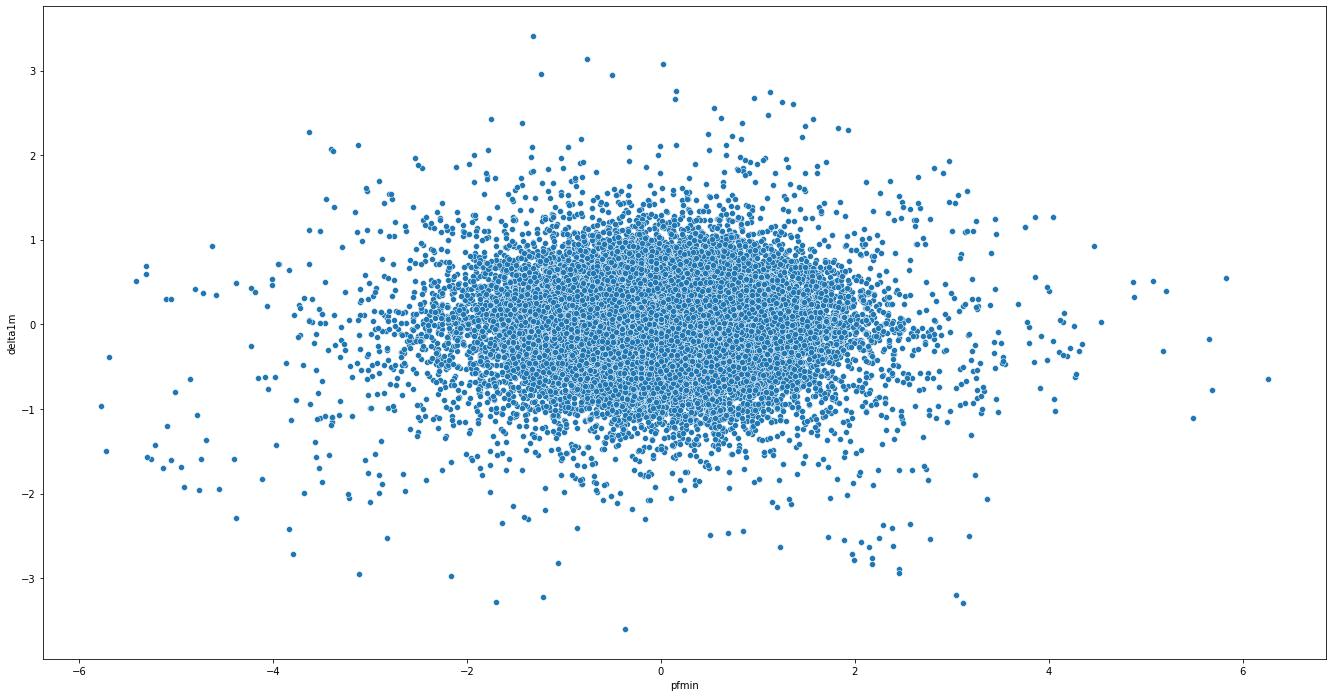

In [201]:
a4_dims = (23,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x=df.pfmin, y=df.delta1m)

In [209]:
df.columns[11:33]

Index(['TradeDay', 'mu10min', 'mu5min', 'mu2min', 'mumin', 'dev', 'delta1m',
       'delta2m', 'delta5m', 'delta10m', 'pbmin', 'pb5min', 'pb10min',
       'pb15min', 'pb30min', 'pfmin', 'pf2min', 'pf5min', 'pf10min',
       'pf15min'],
      dtype='object')

In [202]:
df.drop(df.head(30*12).index, inplace=True)
df.drop(df.tail(15*12).index, inplace=True)

In [203]:
df.shape[0]

80947

In [210]:
df_corr = df[df.columns[11:33]]
 

In [ ]:
df_corr.head()

In [211]:
df_corr.corr()

,TradeDay,mu10min,mu5min,mu2min,mumin,dev,delta1m,delta2m,delta5m,delta10m,pbmin,pb5min,pb10min,pb15min,pb30min,pfmin,pf2min,pf5min,pf10min,pf15min
TradeDay,1.000000,0.519888,0.521033,0.521728,0.521959,0.014800,0.020696,0.029935,0.047878,0.068155,0.024575,0.055562,0.079677,0.098984,0.139560,0.024184,0.034377,0.055611,0.080533,0.100603
mu10min,0.519888,1.000000,0.999087,0.997671,0.997058,0.011514,-0.000294,0.001417,0.011205,0.037090,0.000520,0.021636,0.068619,0.114106,0.196657,-0.001988,-0.002089,-0.001547,-0.001124,-0.001683
mu5min,0.521033,0.999087,1.000000,0.999337,0.998821,0.012018,0.000556,0.004628,0.025783,0.068904,0.002412,0.047778,0.105421,0.142996,0.216253,-0.002838,-0.003552,-0.003922,-0.002403,-0.002438
mu2min,0.521728,0.997671,0.999337,1.000000,0.999814,0.012784,0.004830,0.016471,0.055217,0.098564,0.010022,0.079288,0.127081,0.160463,0.228106,-0.002898,-0.003766,-0.004811,-0.003765,-0.003084
mumin,0.521959,0.997058,0.998821,0.999814,1.000000,0.013312,0.011769,0.031241,0.069885,0.110066,0.022643,0.089662,0.134045,0.166268,0.232029,-0.002890,-0.003634,-0.004806,-0.004339,-0.003277
dev,0.014800,0.011514,0.012018,0.012784,0.013312,1.000000,0.243378,0.182036,0.126205,0.095777,0.149596,0.080480,0.057845,0.050708,0.036147,0.091977,0.067069,0.040556,0.025327,0.022555
delta1m,0.020696,-0.000294,0.000556,0.004830,0.011769,0.243378,1.000000,0.875228,0.614709,0.445336,0.844911,0.372203,0.253204,0.213833,0.145083,-0.012683,-0.000305,-0.003868,-0.019144,-0.009133
delta2m,0.029935,0.001417,0.004628,0.016471,0.031241,0.182036,0.875228,1.000000,0.818552,0.617599,0.921254,0.536572,0.363852,0.306194,0.209464,-0.008574,0.003263,-0.002621,-0.028666,-0.011531
delta5m,0.047878,0.011205,0.025783,0.055217,0.069885,0.126205,0.614709,0.818552,1.000000,0.880455,0.698993,0.860297,0.590727,0.486274,0.335084,-0.006427,-0.001660,-0.016581,-0.040595,-0.018012
delta10m,0.068155,0.037090,0.068904,0.098564,0.110066,0.095777,0.445336,0.617599,0.880455,1.000000,0.517336,0.918248,0.854871,0.689458,0.476124,-0.014647,-0.018501,-0.039794,-0.043876,-0.021724


In [218]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="pfmin~dev+delta5m+delta10m", data=df).fit()
lm.params
lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.009      
Dependent Variable: pfmin            AIC:                151730.0499
Date:               2020-12-05 19:52 BIC:                151767.2561
No. Observations:   80947            Log-Likelihood:     -75861.    
Df Model:           3                F-statistic:        246.2      
Df Residuals:       80943            Prob (F-statistic): 4.53e-159  
R-squared:          0.009            Scale:              0.38156    
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
Intercept     0.0057     0.0022    2.6144   0.0089    0.0014    0.0099
dev           0.4088     0.0154   26.5700   0.0000    0.3786    0.4389
delta5m       0.0089     0.0058    1.5265   0.1269   -0.0025    0.0204
delta10m     -0.0187     0.0041   -4.5487   0.0000   -0.0268   -0.0107
--------------------------------------------------------------------
Omnibus:            11601.955      Durbin-Watson:         0.167     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      152837.613
Skew:               -0.217         Prob(JB):              0.000     
Kurtosis:           9.718          Condition No.:         9         
====================================================================

"""

In [221]:
import lightgbm as lgb

In [59]:
"{0:.2f}%".format(100*df.pfmin[ abs(df.pfmin)< 1].shape[0]/df.shape[0])

'94.24%'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


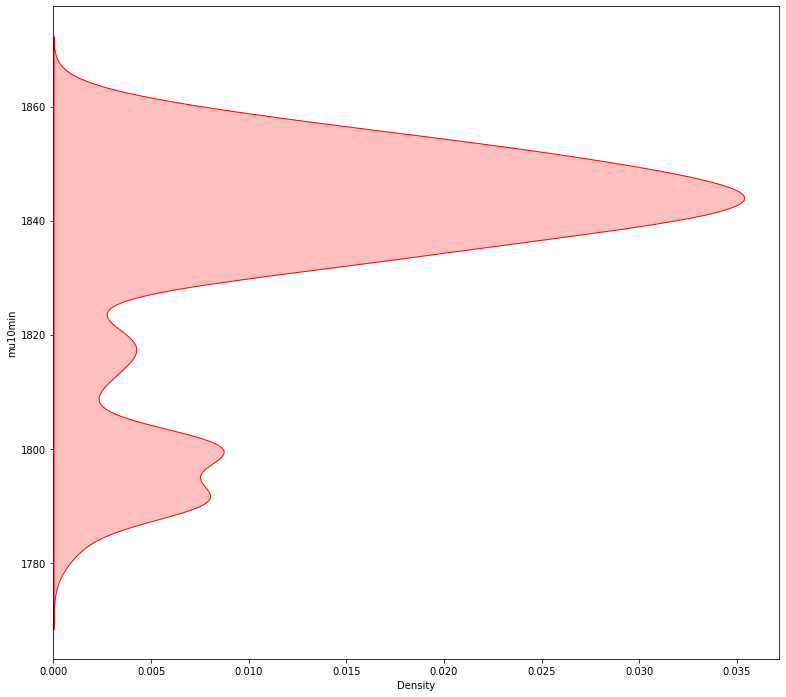

In [178]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df.mu10min, shade=True, vertical=True, color="red")